### Importing Dependencies

In [1]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

In [2]:
df = pd.read_csv('combined_snp100_data.csv')

### Removing unwanted columns

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Symbol,Name,Date,Adj_Close,Close,High,Low,Open,Volume,Spred-HL,Spread-OC
0,AAPL,Apple Inc.,2020-01-02,74.444603,75.087502,75.150002,73.797501,74.059998,"135,480,400",-1.352501,1.027504
1,AAPL,Apple Inc.,2020-01-03,73.720840,74.357498,75.144997,74.125000,74.287498,"146,322,800",-1.019997,0.070000
2,AAPL,Apple Inc.,2020-01-06,74.308266,74.949997,74.989998,73.187500,73.447502,"118,387,200",-1.802498,1.502495
3,AAPL,Apple Inc.,2020-01-07,73.958794,74.597504,75.224998,74.370003,74.959999,"108,872,000",-0.854996,-0.362495
4,AAPL,Apple Inc.,2020-01-08,75.148521,75.797501,76.110001,74.290001,74.290001,"132,079,200",-1.820000,1.507500


In [7]:
df.to_csv('candlestick.csv')

### Adding Spread to the data

In [5]:
df['Spred-HL']=df['Low']-df['High']
df['Spread-OC']=df['Close']-df['Open']

In [81]:
def candle(data):
    data=data.drop('Unnamed: 0',axis=1)
    data['Date']=pd.to_datetime(data['Date'])
    data=data.set_index('Date')
    data.Volume=pd.to_numeric(data.Volume,errors='coerce')
    return mpf.plot(data['2020-01':'2020-04'],figratio=(20,12),
            type='candle',
            tight_layout = True,
            style='yahoo')

In [82]:
df_apple = df[df['Symbol']=='AAPL']

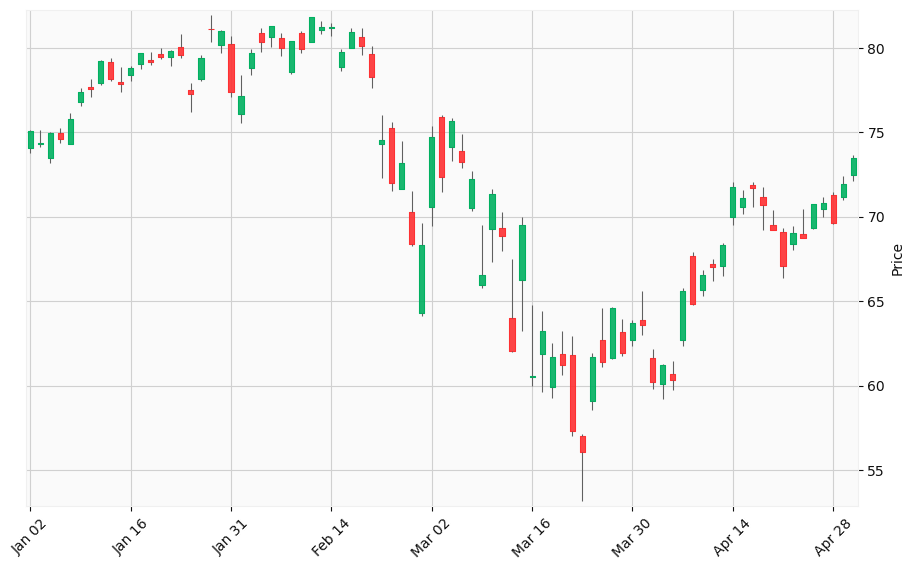

In [83]:
candle(df_apple)

### Adding Web Scraping Code

In [16]:
from bs4 import BeautifulSoup,Tag
import requests
from splinter import Browser
import pandas as pd
from pprint import pprint

# For time stamps
from datetime import date

### Establishing Path

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

### Importing required company names

In [3]:
companies = pd.read_csv('companylist.csv')
names=companies['Ticker Symbol']

In [17]:
pprint(companies)

pprint(date.today())

   Ticker Symbol                                     Company
0           CSCO                          Cisco Systems Inc.
1            TRV                    Travelers Companies Inc.
2            IBM  International Business Machine Corporation
3            PFE                                 Pfizer Inc.
4            JNJ                         Johnson and Johnson
5            AXP                    American Express Company
6             GS                    Goldman Sachs Group Inc.
7          GOOGL                                 Google Inc.
8             GE                            General Electric
9             KO                       The Coca Cola Company
10            VZ                      Verizon Communications
11            BA                                   Boeing Co
12           NKE                                   Nike Inc.
13           CVX                         Chevron Corporation
14          AMZN                                 Amazon Inc.
15           UNH        

In [102]:
pprint(names)

0      CSCO
1       TRV
2       IBM
3       PFE
4       JNJ
5       AXP
6        GS
7     GOOGL
8        GE
9        KO
10       VZ
11       BA
12      NKE
13      CVX
14     AMZN
15      UNH
16      WMT
17      MMM
18      JPM
19      DIS
20      CAT
21      MRK
22      XOM
23     MSFT
24       HD
25     INTC
26       PG
27     AAPL
Name: Ticker Symbol, dtype: object


### Capturing Variables from URL

In [5]:
# Creating and Assigining URL

url='https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch'
browser.visit(url)
html=browser.html
soup=BeautifulSoup(html,"html.parser")

In [21]:
leftTable = soup.find("table",class_="W(100%)")

In [22]:
pprint(leftTable)

<table class="W(100%)" data-reactid="92"><tbody data-reactid="93"><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="94"><td class="C($primaryColor) W(51%)" data-reactid="95"><span data-reactid="96">Previous Close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="97" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s)" data-reactid="98">136.87</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="99"><td class="C($primaryColor) W(51%)" data-reactid="100"><span data-reactid="101">Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="102" data-test="OPEN-value"><span class="Trsdu(0.3s)" data-reactid="103">136.28</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="104"><td class="C($primaryColor) W(51%)" data-reactid="105"><span data-reactid="106">Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="107" data-test="BID-value"><span c

In [84]:
table_rows = leftTable.find_all('tr')

#pprint (table_rows)
td = table_rows[0].find_all('td')
pprint(td[1].text)
    
for row in table_rows:
    td = row.find_all('td')
    
    pprint(td[1].text)

    col = [i.text for i in td]
    
    #print(col[0])

'28.93'
'28.93'
'28.76'
'28.84 x 3100'
'28.85 x 2200'
'28.49 - 29.07'
'26.08 - 38.82'
'24,110,789'
'42,094,531'


In [16]:
rightTable  = soup.find("table",class_="W(100%) M(0) Bdcl(c)")

In [18]:
pprint(rightTable)

<table class="W(100%) M(0) Bdcl(c)" data-reactid="133"><tbody data-reactid="134"><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="135"><td class="C($primaryColor) W(51%)" data-reactid="136"><span data-reactid="137">Market Cap</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="138" data-test="MARKET_CAP-value"><span class="Trsdu(0.3s)" data-reactid="139">2.34T</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="140"><td class="C($primaryColor) W(51%)" data-reactid="141"><span data-reactid="142">Beta (5Y Monthly)</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="143" data-test="BETA_5Y-value"><span class="Trsdu(0.3s)" data-reactid="144">1.28</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="145"><td class="C($primaryColor) W(51%)" data-reactid="146"><span data-reactid="147">PE Ratio (TTM)</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-re

In [31]:
table_rows = rightTable.find_all('tr')

#pprint (table_rows)
for row in table_rows:
    td = row.find_all('td')
    col = [i.text for i in td]
    print(col)

['Market Cap', '2.34T']
['Beta (5Y Monthly)', '1.28']
['PE Ratio (TTM)', '42.40']
['EPS (TTM)', '3.28']
['Earnings Date', 'Jan 27, 2021']
['Forward Dividend & Yield', '0.82 (0.59%)']
['Ex-Dividend Date', 'Nov 06, 2020']
['1y Target Est', '134.51']


In [23]:
perOutlook = soup.find("ul",class_="P(0) M(0) List(n) Whs(nw) BdStart Bdstartc($seperatorColor)")
pprint(perOutlook)


<ul class="P(0) M(0) List(n) Whs(nw) BdStart Bdstartc($seperatorColor)" data-reactid="62"><li class="P(0) W(70px) IbBox Bd Bdstartw(0px) Bdc($seperatorColor) Whs(n)" data-reactid="63"><a class="D(b) Bxz(bb) Bdrs(2px) C($primaryColor) Cur(p) Td(n) Fz(xs) Px(8px) Py(2px) H(45px) pill Bgc($linkColor):h C(white):h Bdc($linkColor):h" data-reactid="64" href="/chart/AAPL?technical=short&amp;ncid=qspchartev_p0388xcdxfe"><div class="Whs(nw)" data-reactid="65"><div class="IbBlock W(60%) Whs(n) Fl(start)" data-reactid="66"><span data-reactid="67">Short Term</span></div><div class="IbBlock W(40%)" data-reactid="68"><svg class="Va(m)! pill:h_Stk(white)! pill:h_Fill(white)! Cur(p)" data-icon="arrow-filled-circle" data-reactid="69" height="26" style="fill:#1ac567;stroke:#1ac567;stroke-width:0;vertical-align:bottom;" viewbox="0 0 24 24" width="26" xmlns="http://www.w3.org/2000/svg"><path d="M12 21c-4.97 0-9-4.03-9-9s4.03-9 9-9 9 4.03 9 9-4.03 9-9 9zM8.265 9.783c-.374.38-.35.972.057 1.32.405.35 1.038.3

In [12]:
def StockTrend (txt):
    if 'RotateZ' not in txt :     
        return "Up"
    if 'RotateZ(180deg)' in txt:   
        return "Down"
    if 'RotateZ(90deg)' in txt:
        return "Nuetral"    
    return "Incorrect"
    

for item in perOutlook.findAll('li'):
    if isinstance(item, Tag):
        print (item.text)
        svgs = item.findAll('svg')
        txt = svgs[0]['class']
        result = StockTrend(txt)
        pprint(result)
        for svg in svgs:
            pprint (svg['class'])

#pprint(svgs)


Short Term2W - 6W


IndexError: list index out of range

In [8]:
# build the list
def StockTrend (txt):
    if 'RotateZ' not in txt :     
        return "Up"
    if 'RotateZ(180deg)' in txt:   
        return "Down"
    if 'RotateZ(90deg)' in txt:
        return "Nuetral"    
    return "Incorrect"

TodayList = []
for index, compRow in companies.iterrows():
    
    pprint(compRow)
    url=f'https://finance.yahoo.com/quote/{compRow[0]}?p={compRow[0]}&.tsrc=fin-srch'
    browser.visit(url)
    html=browser.html
    soup=BeautifulSoup(html,"html.parser")
    leftTable = soup.find("table",class_="W(100%)")
    
    rightTable  = soup.find("table",class_="W(100%) M(0) Bdcl(c)")
 
    perOutlook = soup.find("ul",class_="P(0) M(0) List(n) Whs(nw) BdStart Bdstartc($seperatorColor)")
    #dict = 
    # parse the left table contents 

    table_left_rows = leftTable.find_all('tr')

    # parse the required columns for the 
 
    td = table_left_rows[0].find_all('td')
    close = td[1].text
    td = table_left_rows[1].find_all('td')
    opn = td[1].text
    td = table_left_rows[5].find_all('td')
    weekRange = td[1].text
    td = table_left_rows[6].find_all('td')
    volume = td[1].text
    
    table_right_rows = rightTable.find_all('tr')
    
    td = table_right_rows[0].find_all('td')
    marketCap = td[1].text
    td = table_right_rows[2].find_all('td')
    peRatio = td[1].text
    td = table_right_rows[3].find_all('td')
    eps = td[1].text
    td = table_right_rows[4].find_all('td')
    earnings = td[1].text
    td = table_right_rows[5].find_all('td')
    dividend = td[1].text
    
    if  perOutlook.findAll('li') :
        
        outlook_items = perOutlook.findAll('li')    
        
        if  outlook_items[0].findAll('svg') :
            svgs = outlook_items[0].findAll('svg')
            txt = svgs[0]['class']
            shortTerm = StockTrend(txt)

            svgs = outlook_items[1].findAll('svg')
            txt = svgs[0]['class']
            middleTerm = StockTrend(txt)

            svgs = outlook_items[2].findAll('svg')
            txt = svgs[0]['class']
            longTerm = StockTrend(txt)

            
    dict = {
        "Date" : date.today()
        "Ticker": compRow[0],
        "Name": compRow[1],
        "Open": opn,
        "Close": close,
        "Volume" : volume,
        "52WeekRange" : weekRange,
        "MarketCap" : marketCap,
        "PERatio" : peRatio,
        "EPS" : eps,
        "EarningsDate": earnings ,
        "DividendRate" : dividend,
        "ShortTerm" :shortTerm,
        "MiddleTerm" :middleTerm,
        "LongTerm" : longTerm       
    }
    pprint(dict)
    TodayList.append(dict);
            
            
            
    
    

    
    

Ticker Symbol                  CSCO
Company          Cisco Systems Inc.
Name: 0, dtype: object
{'52WeekRange': '32.40 - 50.28',
 'Close': '44.77',
 'DividendRate': '1.44 (3.22%)',
 'EPS': '2.47',
 'EarningsDate': 'Feb 09, 2021',
 'LongTerm': 'Up',
 'MarketCap': '189.916B',
 'MiddleTerm': 'Up',
 'Name': 'Cisco Systems Inc.',
 'Open': '45.04',
 'PERatio': '18.20',
 'ShortTerm': 'Up',
 'Ticker': 'CSCO',
 'Volume': '10,192,841'}
Ticker Symbol                         TRV
Company          Travelers Companies Inc.
Name: 1, dtype: object
{'52WeekRange': '76.99 - 152.29',
 'Close': '145.84',
 'DividendRate': '3.40 (2.33%)',
 'EPS': '10.52',
 'EarningsDate': 'Apr 19, 2021 - Apr 23, 2021',
 'LongTerm': 'Up',
 'MarketCap': '36.881B',
 'MiddleTerm': 'Up',
 'Name': 'Travelers Companies Inc.',
 'Open': '144.50',
 'PERatio': '13.89',
 'ShortTerm': 'Up',
 'Ticker': 'TRV',
 'Volume': '707,001'}
Ticker Symbol                                           IBM
Company          International Business Machine Co

{'52WeekRange': '79.07 - 183.40',
 'Close': '172.78',
 'DividendRate': 'N/A (N/A)',
 'EPS': '-1.59',
 'EarningsDate': 'Feb 11, 2021',
 'LongTerm': 'Up',
 'MarketCap': '309.876B',
 'MiddleTerm': 'Up',
 'Name': 'Walt Disney Co',
 'Open': '171.89',
 'PERatio': 'N/A',
 'ShortTerm': 'Up',
 'Ticker': 'DIS',
 'Volume': '5,572,562'}
Ticker Symbol               CAT
Company          Caterpillar Co
Name: 20, dtype: object
{'52WeekRange': '87.50 - 200.17',
 'Close': '191.94',
 'DividendRate': '4.12 (2.15%)',
 'EPS': '6.03',
 'EarningsDate': 'Jan 29, 2021',
 'LongTerm': 'Up',
 'MarketCap': '102.382B',
 'MiddleTerm': 'Up',
 'Name': 'Caterpillar Co',
 'Open': '190.56',
 'PERatio': '31.24',
 'ShortTerm': 'Up',
 'Ticker': 'CAT',
 'Volume': '2,134,120'}
Ticker Symbol                 MRK
Company          Merck & Co., Inc
Name: 21, dtype: object
{'52WeekRange': '65.25 - 89.20',
 'Close': '80.98',
 'DividendRate': '2.60 (3.21%)',
 'EPS': '4.53',
 'EarningsDate': 'Feb 04, 2021',
 'LongTerm': 'Up',
 'MarketC

In [9]:
pprint(len(TodayList))

28


In [10]:
df = pd.DataFrame(TodayList)
print(df.head())

  Ticker                                        Name    Open   Close  \
0   CSCO                          Cisco Systems Inc.   45.04   44.77   
1    TRV                    Travelers Companies Inc.  144.50  145.84   
2    IBM  International Business Machine Corporation  118.76  118.61   
3    PFE                                 Pfizer Inc.   36.55   36.55   
4    JNJ                         Johnson and Johnson  165.01  163.55   

       Volume      52WeekRange MarketCap PERatio    EPS  \
0  10,192,841    32.40 - 50.28  189.916B   18.20   2.47   
1     707,001   76.99 - 152.29   36.881B   13.89  10.52   
2  10,117,292   90.56 - 158.75  105.703B   19.04   6.23   
3  20,315,538    26.45 - 43.08  206.063B   24.10   1.54   
4   6,338,231  109.16 - 166.06  436.317B   26.06   6.36   

                  EarningsDate  DividendRate ShortTerm MiddleTerm LongTerm  
0                 Feb 09, 2021  1.44 (3.22%)        Up         Up       Up  
1  Apr 19, 2021 - Apr 23, 2021  3.40 (2.33%)        Up    

In [11]:
df.to_csv("Today.csv", idex="False")